
# Values taken from Arima Prediction from 25/02/2024 to 02/03/2024

In [1]:
predictions_OpenBalance_2024 = [2310.3908605415027, 2442.1285856952577, 2550.0566774702684, 2541.1237203262754, 2535.0970020431387, 2417.3723961642877, 2425.015377210721, 2504.4318934284975, 2594.66849150132, 2670.1428948365465, 2671.0389221186333, 2646.4437959086486, 2555.084217181012, 2545.3649544011346, 2583.2964204040854, 2647.87158867249, 2704.94201711114, 2713.1856934441766, 2687.816401103672, 2619.875676906129, 2602.03262044935, 2618.493517586613, 2665.074485641766, 2709.7514990216137, 2722.1697430251374, 2701.969562346561, 2652.3718643866014, 2631.7164631511787, 2636.7677985515056, 2669.974501773713]
print(len(predictions_OpenBalance_2024))
predictions_OpenBalance_2024 = predictions_OpenBalance_2024[:7]
predictions_NewCases_2024 = [340.27215586987444, 617.1434039659193, 610.0675819153706, 559.5010833431464, 540.1901603911051, 404.3295355534742, 277.9083081491507]
predictions_CSA_2024 = [0.0, 24.0, 27.0, 24.0, 22.0, 27.0, 0.0]
predictions_CSE_2024 = [0.0, 26.0, 31.0, 35.0, 30.0, 32.0, 8.0]
predictions_Temps_2024 = [6.21726063212965, 11.118588922032702, 9.786351237377655, 12.976380521486655, 13.247315840425893, 13.396516811283231, 9.59180986963147]

30


# Actual Open Balance for 25/02/2024-02/03/2024

In [2]:
open_balance_feb2024 = [2405, 2622, 2638, 2597, 2404, 2418,2394]

# Define Manpower

In [3]:
no_CSA = 3
no_CSE = 9
no_Temp = 10

# Get simulation Period

In [4]:
period = len(predictions_OpenBalance_2024)

# Calculate total closed case per day

In [5]:
closed_case = [0]*period
for i in range(period):
    closed_case[i] = (no_CSA*predictions_CSA_2024[i]) + (no_CSE*predictions_CSE_2024[i]) + (no_Temp*predictions_Temps_2024[i])
print(closed_case)

[62.172606321296506, 417.185889220327, 457.86351237377653, 516.7638052148666, 468.4731584042589, 502.9651681128323, 167.9180986963147]


# Forecast Open Balance

In [6]:
forecasted_openbalance = [0]*period
forecasted_openbalance[0] = predictions_OpenBalance_2024[0]

In [7]:
for i in range(period - 1):
    forecasted_openbalance[i+1] = predictions_OpenBalance_2024[i] + predictions_NewCases_2024[i] - closed_case[i]

In [8]:
print(forecasted_openbalance)

[2310.3908605415027, 2588.490410090081, 2642.08610044085, 2702.260747011863, 2583.8609984545556, 2606.814004029985, 2318.7367636049294]


# Visualise forecasted open balance

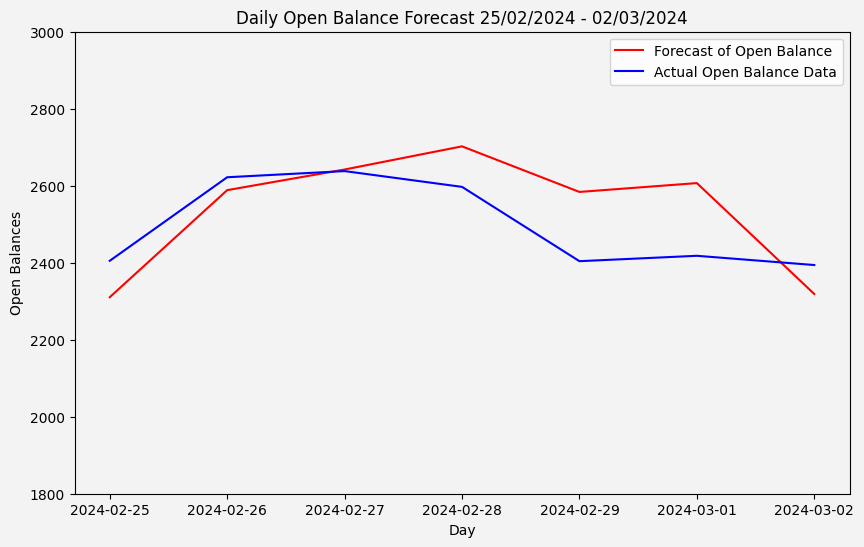

In [9]:
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

start_date = datetime(2024, 2, 25)
date_range = [start_date + timedelta(days=i) for i in range(period)]

# # Sample data
# days = list(range(1, period + 1))

# Set figure size
plt.figure(figsize=(10, 6), facecolor='#F2F3F2')  # Adjust width and height as needed

# Plotting the graph
plt.plot(date_range, forecasted_openbalance,label='Forecast of Open Balance', color='red')
plt.plot(date_range, open_balance_feb2024, label='Actual Open Balance Data', color='blue')

# Adding labels and title
plt.xlabel('Day')
plt.ylabel('Open Balances')
plt.title('Daily Open Balance Forecast 25/02/2024 - 02/03/2024')

plt.legend()

# Set y-axis limit range
plt.ylim(1800, 3000)

# Set background color within the graph area
plt.gca().set_facecolor('#F2F3F2')

# Displaying the graph
plt.show()



In [10]:
from sklearn.metrics import mean_squared_error
import math

mse = mean_squared_error(open_balance_feb2024, forecasted_openbalance)
print("Mean Squared Error (MSE):", mse)
rmse = math.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Squared Error (MSE): 13547.937799840223
Root Mean Squared Error (RMSE): 116.3956090230221


# Targeted Case Closure Rate

In [11]:
import itertools

# Define ranges for case_closure_rate targets
ranges = {
    'CSA': (15, 25),
    'CSE': (10, 35),
    'Temps': (10, 25),
}

# Define function to calculate total_case_closed_perday_target
def calculate_total_case_closed(targets, counts):
    total = 0
    for target, count in zip(targets, counts):
        total += target * count
    return total

# Define function to check if open_balances differ by at most 500
def within_threshold(open_balances, threshold=500):
    for i in range(len(open_balances) - 1):
        if abs(open_balances[i + 1] - open_balances[i]) > threshold:
            return False
    return True


In [12]:
# Create a list of value ranges for each target
value_ranges = [range(start, end + 1) for start, end in ranges.values()]

# Generate all combinations of values
combinations = list(itertools.product(*value_ranges))

# Print the combinations
for combination in combinations:
    print(combination)

(15, 10, 10)
(15, 10, 11)
(15, 10, 12)
(15, 10, 13)
(15, 10, 14)
(15, 10, 15)
(15, 10, 16)
(15, 10, 17)
(15, 10, 18)
(15, 10, 19)
(15, 10, 20)
(15, 10, 21)
(15, 10, 22)
(15, 10, 23)
(15, 10, 24)
(15, 10, 25)
(15, 11, 10)
(15, 11, 11)
(15, 11, 12)
(15, 11, 13)
(15, 11, 14)
(15, 11, 15)
(15, 11, 16)
(15, 11, 17)
(15, 11, 18)
(15, 11, 19)
(15, 11, 20)
(15, 11, 21)
(15, 11, 22)
(15, 11, 23)
(15, 11, 24)
(15, 11, 25)
(15, 12, 10)
(15, 12, 11)
(15, 12, 12)
(15, 12, 13)
(15, 12, 14)
(15, 12, 15)
(15, 12, 16)
(15, 12, 17)
(15, 12, 18)
(15, 12, 19)
(15, 12, 20)
(15, 12, 21)
(15, 12, 22)
(15, 12, 23)
(15, 12, 24)
(15, 12, 25)
(15, 13, 10)
(15, 13, 11)
(15, 13, 12)
(15, 13, 13)
(15, 13, 14)
(15, 13, 15)
(15, 13, 16)
(15, 13, 17)
(15, 13, 18)
(15, 13, 19)
(15, 13, 20)
(15, 13, 21)
(15, 13, 22)
(15, 13, 23)
(15, 13, 24)
(15, 13, 25)
(15, 14, 10)
(15, 14, 11)
(15, 14, 12)
(15, 14, 13)
(15, 14, 14)
(15, 14, 15)
(15, 14, 16)
(15, 14, 17)
(15, 14, 18)
(15, 14, 19)
(15, 14, 20)
(15, 14, 21)
(15, 14, 22)

In [13]:
valid_combinations = {}

# Iterate through combinations and find the best one
for combination in combinations:
    new_open_balances = predictions_OpenBalance_2024.copy()
    total_case_closed_perday_target = calculate_total_case_closed(combination, [no_CSA, no_CSE, no_Temp])
    for i in range(period - 1):
        new_open_balances[i + 1] = new_open_balances[i] + predictions_NewCases_2024[i] - total_case_closed_perday_target

    if within_threshold(new_open_balances):
        valid_combinations[combination] = new_open_balances


In [17]:
# Sort the dictionary based on the last element of the list value
sorted_dict = dict(sorted(valid_combinations.items(), key=lambda item: item[1][-1]))
print(sorted_dict)
print(len(sorted_dict))
# Filter the sorted dictionary to include only items with last element in range 2000 to 3000
filtered_dict = {key: value for key, value in sorted_dict.items() if 1300 <= value[-1] <= 2000}

# Print the sorted dictionary
print(filtered_dict)
print(len(filtered_dict))

{(25, 35, 25): [2310.3908605415027, 2010.6630164113772, 1987.8064203772965, 1957.8740022926672, 1877.3750856358138, 1777.5652460269189, 1541.894781580393], (24, 35, 25): [2310.3908605415027, 2013.6630164113772, 1993.8064203772965, 1966.8740022926672, 1889.3750856358138, 1792.5652460269189, 1559.894781580393], (23, 35, 25): [2310.3908605415027, 2016.6630164113772, 1999.8064203772965, 1975.8740022926672, 1901.3750856358138, 1807.5652460269189, 1577.894781580393], (22, 35, 25): [2310.3908605415027, 2019.6630164113772, 2005.8064203772965, 1984.8740022926672, 1913.3750856358138, 1822.5652460269189, 1595.894781580393], (25, 34, 25): [2310.3908605415027, 2019.6630164113772, 2005.8064203772965, 1984.8740022926672, 1913.3750856358138, 1822.5652460269189, 1595.894781580393], (25, 35, 24): [2310.3908605415027, 2020.6630164113772, 2007.8064203772965, 1987.8740022926672, 1917.3750856358138, 1827.5652460269189, 1601.894781580393], (21, 35, 25): [2310.3908605415027, 2022.6630164113772, 2011.806420377

# Taking First, Middle, Last combinations to give CPF more options

In [20]:
# Get the length of the dictionary
dict_length = len(filtered_dict)

# Calculate the indices for balanced selection
start_index = 0
mid_index = dict_length // 2
end_index = dict_length - 1

selection = {
    key: filtered_dict[key]
    for key in list(filtered_dict)[start_index:start_index+1] +
               list(filtered_dict)[mid_index:mid_index+1] +
               list(filtered_dict)[end_index:end_index+1]
}

# Print the balanced selection
print(selection)
print(len(selection))

{(25, 35, 25): [2310.3908605415027, 2010.6630164113772, 1987.8064203772965, 1957.8740022926672, 1877.3750856358138, 1777.5652460269189, 1541.894781580393], (25, 30, 24): [2310.3908605415027, 2065.663016411377, 2097.8064203772965, 2122.8740022926672, 2097.375085635814, 2052.565246026919, 1871.894781580393], (25, 31, 21): [2310.3908605415027, 2086.663016411377, 2139.8064203772965, 2185.8740022926672, 2181.375085635814, 2157.565246026919, 1997.894781580393]}
3


# Taking the combination with the lowest opening balance on the last day

In [21]:
# Get the length of the dictionary
dict_length = len(filtered_dict)

# Select the first key-value pair
first_key = next(iter(filtered_dict))
first_value = filtered_dict[first_key]

# Create the selection dictionary with the first key-value pair
selection = {first_key: first_value}

# Print the selection dictionary and its length
print(selection)
print(len(selection))


{(25, 35, 25): [2310.3908605415027, 2010.6630164113772, 1987.8064203772965, 1957.8740022926672, 1877.3750856358138, 1777.5652460269189, 1541.894781580393]}
1


# Visualise Forecasted Open Balance with optimal case closure rate

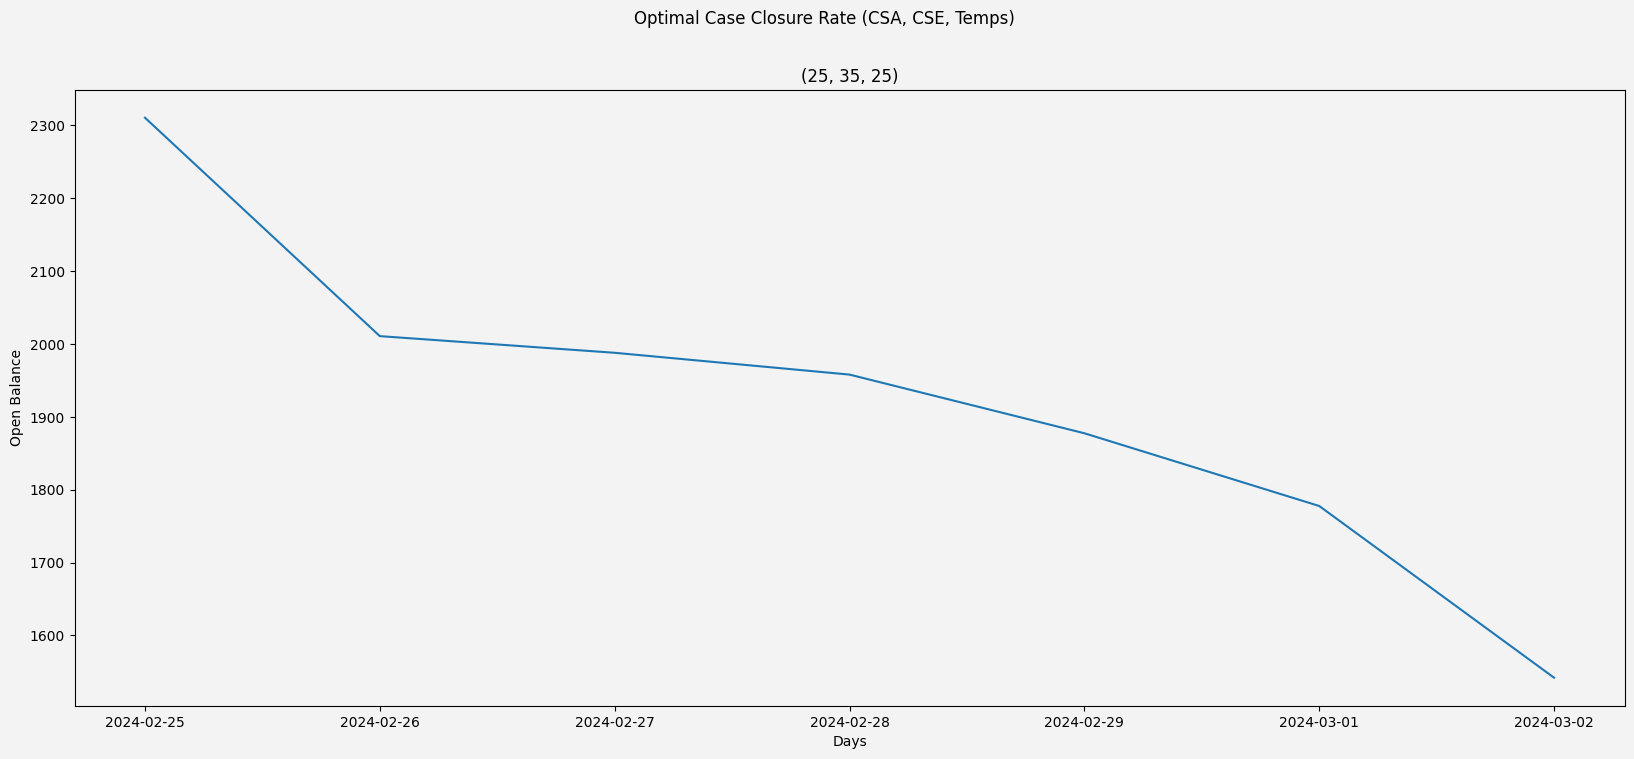

In [24]:
import matplotlib.pyplot as plt

start_date = datetime(2024, 2, 25)
date_range = [start_date + timedelta(days=i) for i in range(period)]

# Create a single subplot
fig, ax = plt.subplots(figsize=(20, 8), facecolor='#F2F3F2')
fig.suptitle('Optimal Case Closure Rate (CSA, CSE, Temps)')

# Extract the key and values from the selection dictionary
key, values = next(iter(selection.items()))

# Plot the data
ax.plot(date_range, values)
ax.set_title(key)
ax.set_xlabel('Days')
ax.set_ylabel('Open Balance')

# Set background color
ax.set_facecolor('#F2F3F2')

# Show plot
plt.show()
